In [1]:
from dna_features_viewer import GraphicFeature, GraphicRecord, BiopythonTranslator
import numpy as np
import pandas as pd

# Get sites under selection and make a protein domain map

In [124]:
gff_file = pd.read_csv("seq_for_analysis/Q9IK91_phosphoprotein.gff", sep="\t", header=None, skiprows=2, usecols=[2, 3, 4, 8])
gff_file.columns = ["Type", "Start", "End", "Description"]

color_dict = {
            "Chain": "lightcyan", # full length protein
            "Disordered Region": "firebrick",
            "Coiled coil": "yellow",
            "Compositional bias": "lightyellow",
            "Helix": "honeydew",
            "Protein Binding": "black",
            "Phosphorylation": "lightsteelblue",
            "Turn": "moccasin",
            "Natural variant": "lightyellow"
}

gff_file["Color"] = gff_file.Type.map(color_dict)

In [215]:
features = []

for i, row in gff_file.iterrows():
    
    if len(row["Type"].split(" ")) == 1 or row["Type"] in ["Coiled coil"]:
        ann = row["Type"]
    elif row["Type"] in ["Disordered Region"]:
        ann = "Disordered"
    elif row["Type"] == "Natural variant":
        ann = "SNP"
    elif row["Type"] in ["Protein Binding", "Compositional bias"]:
        ann = row["Description"].split("=")[1].split(";")[0].strip("residues").strip(" ")
    else:
        print(i)
    
    if row["Type"] != "Natural variant":
        features.append(GraphicFeature(start=row["Start"],
                                       end=row["End"],
                                       strand=+1,
                                       color=row["Color"],
                                       label=ann

                                        )
                       )

In [217]:
meme_sig = pd.read_csv("hyphy/MEME/significance_P.csv")
sig_sites = meme_sig.loc[meme_sig["p-value"] <= 0.1].Site.values

meme_sites = meme_sig.loc[meme_sig["p-value"] <= 0.1].Site.values

# 380 was the only site with diversifying selection in FEL
meme_sites

array([ 58,  64, 228, 377, 380, 408, 421, 437, 438])

In [228]:
def plot_protein_with_selected_sites(select_sites, features, fig_title):
    
    features_updated = features.copy()
    
    for site in select_sites:
        features_updated.append(GraphicFeature(start=site, end=site, strand=+1, color="forestgreen", label="X"))
        
    record = GraphicRecord(sequence_length=709, features=features_updated)
    ax, _ = record.plot(figure_width=30)
    ax.figure.tight_layout()
    ax.figure.savefig("figures/" + fig_title + ".png", dpi=300)

## Positive Selection

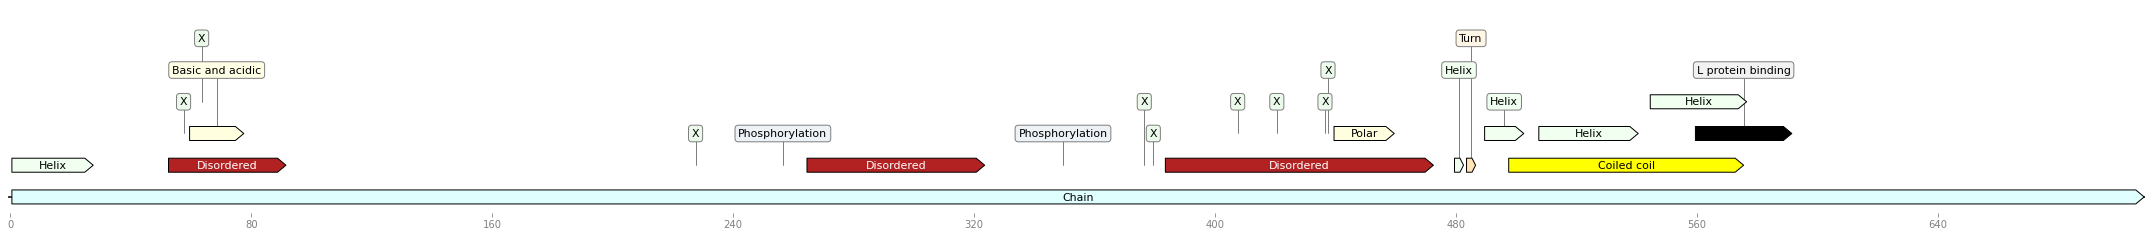

In [229]:
plot_protein_with_selected_sites(meme_sites, features, "positive_selection")

## Negative Selection

In [225]:
neg_sites_0_05 = [192, 244, 246, 251, 261, 271, 302, 336, 347, 375, 390, 391, 403, 551, 555, 561, 586, 608, 611, 642, 643, 698, 699]
neg_sites_0_1 = [32, 33, 47, 192, 214, 215, 243, 246, 251, 256, 257, 261, 271, 302, 314, 329, 336, 347, 349, 353, 360, 368, 375, 390, 391, 401, 403, 451, 502, 506, 514, 515, 520, 524, 530, 549, 551, 555, 561, 563, 586, 599, 608, 610, 611, 619, 637, 642, 643, 644, 661, 686, 690, 698, 699, 707]

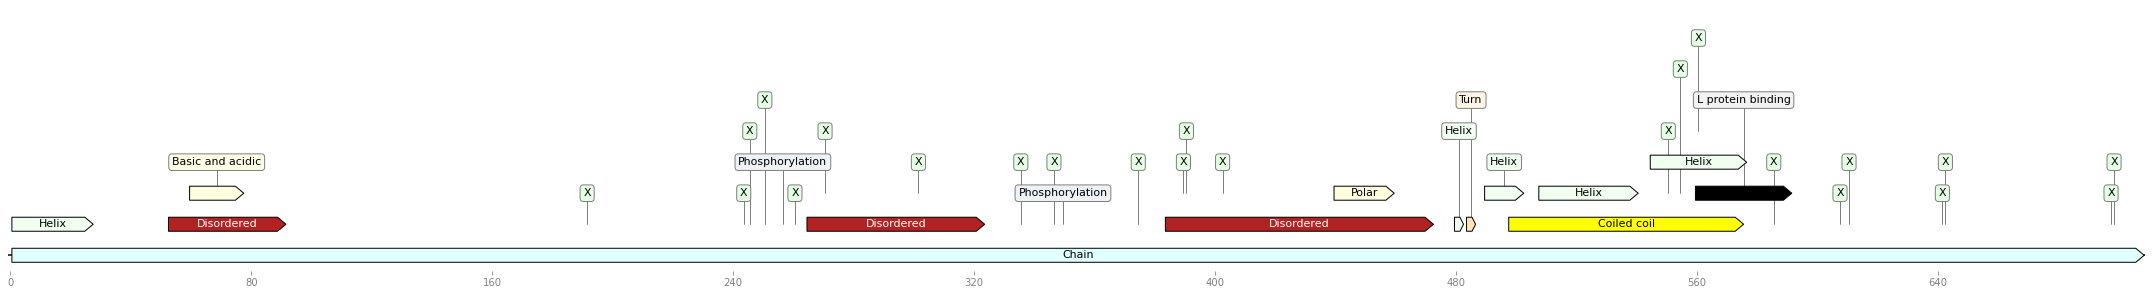

In [226]:
plot_protein_with_selected_sites(neg_sites_0_05, features, "negative_selection_0_05")

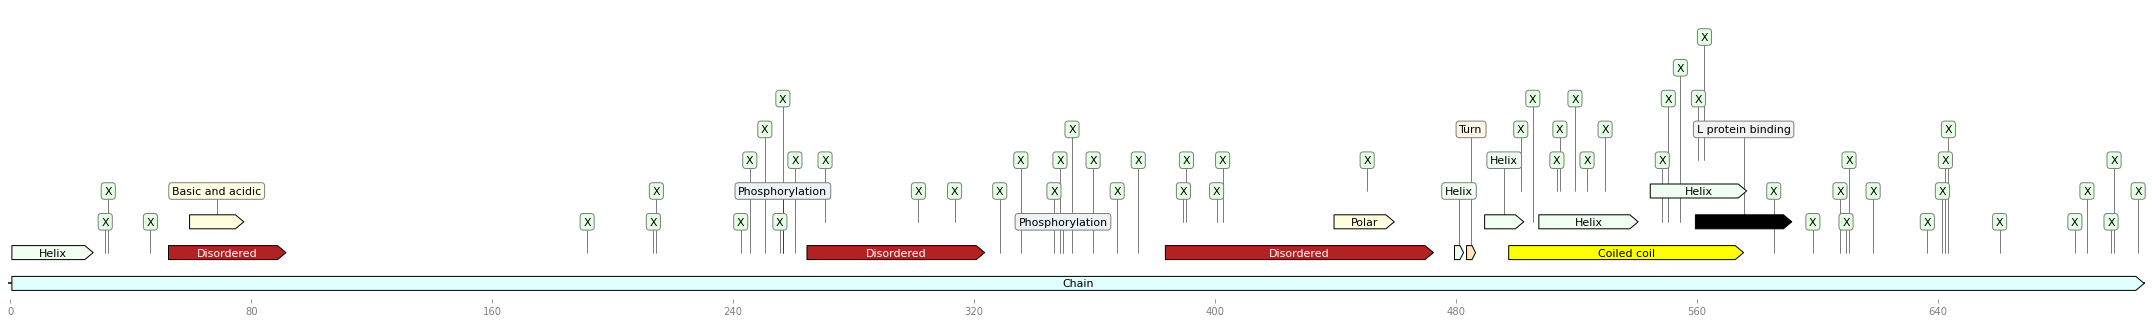

In [227]:
plot_protein_with_selected_sites(neg_sites_0_1, features, "negative_selection_0_1")

In [245]:
contrast_fel_BGD_MYS = pd.read_csv("hyphy/ContrastFEL/20220807_P_BGD_MYS_table.csv")
contrastFel_BGD_MYS_sites = contrast_fel_BGD_MYS.loc[contrast_fel_BGD_MYS['P-value (overall)'] < 0.05].Site.values
contrastFel_BGD_MYS_sites

array([ 41, 195, 303, 304, 408, 412, 427, 437, 438, 439, 467, 590, 664])

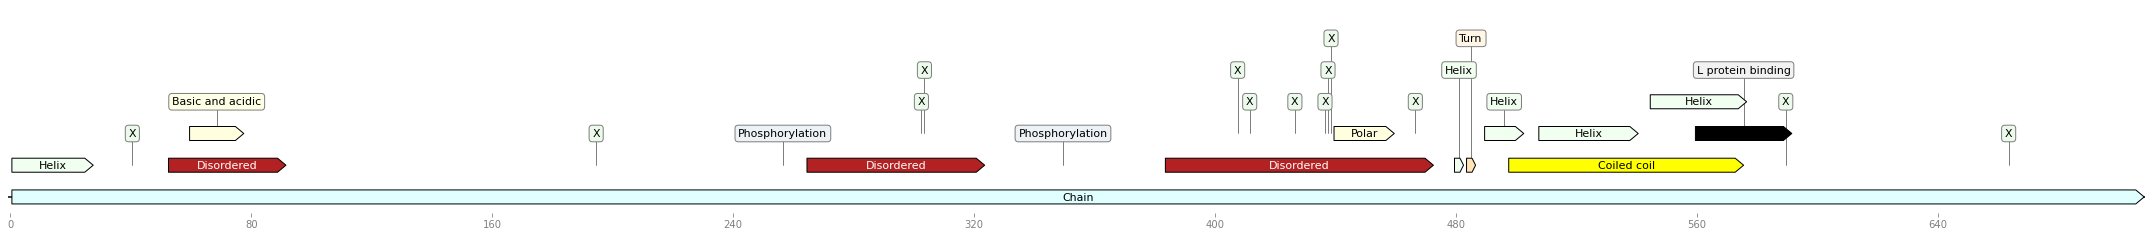

In [246]:
plot_protein_with_selected_sites(contrastFel_BGD_MYS_sites, features, "contrastFEL_BGD_MYS")